In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h_average(s,t,z=.025):                  # averaging kernel     
    return np.double(np.abs(s-t)<=z)/(2*z)

def h_hat(s,t,z=.025):                      # hat function kernel     
    return np.maximum(0,1-np.abs(s-t)/z)/z

def h_gaussian(s,t,z=.025):                 # Gaussian kernel     
    c = 1/(np.sqrt(np.pi)*z)
    return c*np.exp(-np.power(s-t,2)/(z**2))
                  
def build_blur_A_gaussian(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_gaussian(s[j],t,z)/n
    return A

def build_blur_A_hat(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_hat(s[j],t,z)/n
    return A

def build_blur_A_average(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_average(s[j],t,z)/n
    return A

In [3]:
def f_function(t=0.5):
    f1 = (t>=0.15)*np.maximum(1-12*(t-.15),0);    # a down ramp
    f2 = np.abs(t-0.5)<=.1;                       # a step
    f3 = np.maximum(1-10*np.abs(t-0.825),0);      # a hat
    return f1+f2+f3 


The next block of code basically replicates the second example from the Section 3 of the text.

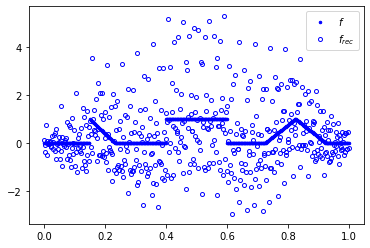

In [62]:
n = 500
z = 0.05;
eps = .00001;

t = np.array([(k+.5)/n for k in range(n)])
A = build_blur_A_hat(n,z);
f = f_function(t);

b = A@f;
e = eps*np.linalg.norm(b)*np.random.randn(n);
bnoise = b+e;

frec = np.linalg.solve(A,bnoise)
plt.plot(t,f,'.',color='blue',markersize=5,label='$f$')
plt.plot(t,frec,'.',markerfacecolor='none',color='blue',\
         markersize=8,label='$f_{rec}$')
plt.legend();

The next code block shows how to implement the regularization solve

1.049742605056911e-14


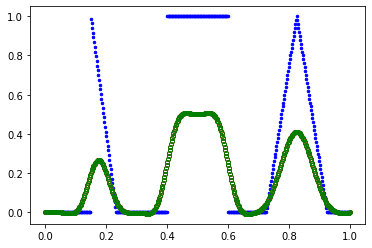

In [64]:
lam = 1;
I   = np.identity(n)
flam = np.linalg.solve(A.T@A+(lam**2)*I,(A.T)@bnoise)
Alam = np.block([[A],[lam*I]])
blam = np.block([bnoise,np.zeros(n)])
flam2 = np.linalg.lstsq(Alam,blam,rcond=None)[0]

plt.plot(t,f,'.',color='blue',markersize=5)
plt.plot(t,flam,'.',markerfacecolor='none',color='red',markersize=8)
plt.plot(t,flam2,'.',markerfacecolor='none',color='green',markersize=8)

print(np.linalg.norm(flam-flam2))

The high precision solution (MATLAB + MCT) is:

f = 
 0.50000000002499747525122
 0.49999999997500247475127

In [86]:
A = np.array([[1,1],[1+1e-6,1-1e-6]])
b = np.array([1,1])
lam = 1e-8;
I    = np.identity(2)
Alam = np.block([[A],[lam*I]])
blam = np.block([b,np.zeros(2)])

flam = np.linalg.solve(A.T@A+(lam**2)*I,(A.T)@b)
flam2 = np.linalg.lstsq(Alam,blam,rcond=None)[0]
print(flam)
print(' ')
print(flam2)
print(' ')
print(np.linalg.norm(b-A@flam)**2+lam**2+np.linalg.norm(flam)**2)
print(np.linalg.norm(b-A@flam2)**2+lam**2+np.linalg.norm(flam2)**2)

[0.50011101 0.49988899]
 
[0.5 0.5]
 
0.5000000245364837
0.5


In [54]:
np.shape(Alam)

(1000, 500)

In [60]:
A = np.array([[1,2],[3,4]])
print(A)
I = np.identity(2);
Alam = np.block([[A],[.01*I]])
print(Alam)
b = np.array([3,2])
blam = np.block([b,np.zeros(2)])
print(blam)
flam = np.linalg.lstsq(Alam,blam,rcond=None)[0]
print(flam)
print(blam-Alam@flam)

[[1 2]
 [3 4]]
[[1.   2.  ]
 [3.   4.  ]
 [0.01 0.  ]
 [0.   0.01]]
[3. 2. 0. 0.]
[-3.99677741  3.4977267 ]
[ 0.00132401 -0.00057456  0.03996777 -0.03497727]


In [44]:
print(bnoise)

[ 3.14097030e-05  1.13105392e-04  1.31904101e-04 -1.12095502e-04
 -1.15674024e-05 -7.38551294e-05 -5.96677594e-05 -6.34575104e-05
  1.92234579e-05 -1.40130142e-05 -5.48532703e-06  1.41242742e-04
  6.08648963e-05 -1.41821012e-05  3.61509208e-05  1.87205070e-06
 -6.36996073e-05 -1.86323176e-04 -2.99133130e-05  8.40290556e-05
  1.77027574e-05  2.42956006e-04  4.83112150e-05  1.13376034e-04
  6.44858940e-05  3.33374360e-05 -1.57987366e-04  1.17475111e-04
  1.09898483e-04  1.87755491e-04  2.28272765e-04  5.36402650e-06
  6.24005774e-05  7.84104696e-05  1.60911192e-04  5.90163150e-05
 -6.30002390e-05 -6.57106925e-05  1.27255447e-04 -8.21226335e-05
  5.36825214e-05  5.46479171e-05  1.22768784e-04  8.54217422e-05
 -1.62082013e-04 -3.95397439e-05  2.93617218e-05 -2.61659359e-05
 -7.97957793e-06  2.18084087e-04  1.66101195e-05  1.52215385e-03
  4.59934626e-03  9.19490795e-03  1.53220800e-02  2.30416708e-02
  3.18781694e-02  4.20597272e-02  5.38529565e-02  6.66797375e-02
  8.06315467e-02  9.59406